In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits_data = keras.datasets.mnist
(train_images,train_labels), (test_images, test_labels) = digits_data.load_data()

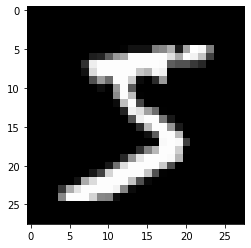

In [3]:
plt.imshow(train_images[0],cmap="gray")

In [4]:
train_images[0].shape

(28, 28)

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
input_layer = keras.layers.Flatten(input_shape=(28,28))
hidden_layer0 = keras.layers.Dense(units=128,activation=tf.nn.relu)
hidden_layer1 = keras.layers.Dense(units=128,activation=tf.nn.relu)
output_layer = keras.layers.Dense(units=10,activation=tf.nn.softmax)
model = keras.models.Sequential([input_layer,hidden_layer0,hidden_layer1,output_layer])

In [7]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(train_images,train_labels,epochs=6)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 12s 194us/sample - loss: 1.5639 - accuracy: 0.9073
Epoch 2/6
60000/60000 [==============================] - 9s 148us/sample - loss: 1.5081 - accuracy: 0.9552
Epoch 3/6
60000/60000 [==============================] - 10s 166us/sample - loss: 1.4983 - accuracy: 0.9641
Epoch 4/6
60000/60000 [==============================] - 11s 176us/sample - loss: 1.4921 - accuracy: 0.9696
Epoch 5/6
60000/60000 [==============================] - 10s 166us/sample - loss: 1.4885 - accuracy: 0.9731
Epoch 6/6
60000/60000 [==============================] - 9s 158us/sample - loss: 1.4865 - accuracy: 0.9750


Checking how the model is working

In [10]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 113us/sample - loss: 1.4910 - accuracy: 0.9713


[1.4909530826568604, 0.9713]

In [11]:
predictions = model.predict(test_images)

7


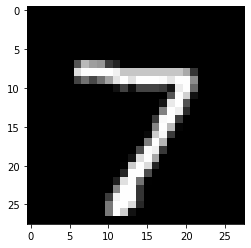

In [12]:
plt.imshow(test_images[0],cmap="gray")
print(np.argmax(predictions[0]))

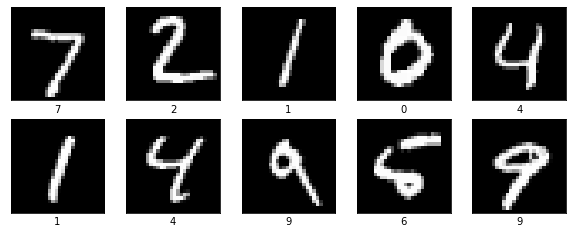

In [13]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap="gray")
    plt.xlabel(np.argmax(predictions[i]))

It predicted the second last one wrong.